# Datan siivoaminen Pythonilla

Jatketaan siitä, mihin jäätiin edellisessä Jupyter notebookissa Data_exploring.

Huomattiin, että ikä ja sukupuoli -sarakkeissa on puuttuvia arvoja. Jos dataa olisi suuret määrät, voitaisiin esimerkiksi pudottaa pois ne rivit, joilla on puuttuvia arvoja missään sarakkeessa. Ensin voisi olla tietysti hyvä tarkistaa, ettei puuttuvista arvoista löyty patternia, vaan että niiden puuttuminen on satunnaista. Emme kuitenkaan mene niin pitkälle tällä kertaa.

Tutkitaanpa kyseisiä sarakkeita vielä hieman tarkemmin. Luetaan tiedosto uudelleen sisään ja tutkitaan sen jälkeen ikäsaraketta. 

In [44]:
import pandas as pd
import numpy as np

df=pd.read_csv('generated_dataset.csv', sep=';')

In [45]:
df['Age'].describe()

count    952.000000
mean      33.381303
std        6.236370
min       16.000000
25%       29.000000
50%       33.000000
75%       37.000000
max       55.000000
Name: Age, dtype: float64

In [46]:
df['Age'].median()

33.0

Erilaisten datan tunnuslukujen lisäksi dataa voidaan myös plotata matplotlib-kirjaston avulla. Piirretään ikä-sarakkeessa olevista arvoista histogrammi.

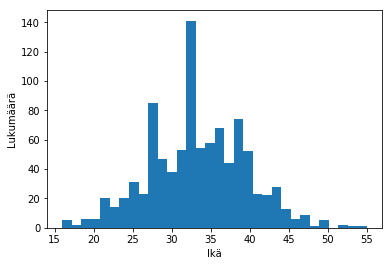

In [47]:
import matplotlib.pyplot as plt

plt.xlabel('Ikä')
plt.ylabel('Lukumäärä')
plt.hist(df['Age'].dropna(), bins=32, range=(df['Age'].min(), df['Age'].max()))
plt.show()

Ikädata näyttää melko normaalisti jakautuneelta. Helppo ratkaisu lisätä puuttuvat arvot on esimerkiksi korvata ne keskiarvolla tai mediaanilla, jotka tässä tapauksessa ovat siis melko samat. Valitaan näistä keskiarvo ja korvataan kaikki puuttuvat arvot sillä *fillna*-funktion avulla:

In [48]:
df['Age']=df['Age'].fillna(df['Age'].mean())

Sitten on vuorossa sukupuolisarake. Sukupuoli onkin hieman mutkikkaampi. Kyseessä on kategorinen muuttuja, joka saattaa olla pääteltävissä esimerkiksi etunimen perusteella, mutta ei aina. Etunimenkään perusteella päättelemistä ei voi automatisoida.

In [49]:
df['Gender'].value_counts()

Male      329
Other     316
Female    303
Name: Gender, dtype: int64

Vaikuttaa siltä, että jokaista sukupuolta on datasetissä noin kolmasosa. Tässä tapauksessa voisimme siis arpoa sukupuolen, jokaisen sukupuolen todennäköisyyden ollessa 0.3:

In [50]:
df['Gender']=df['Gender'].fillna(np.random.choice(['Female', 'Male', 'Other'], p=[1/3, 1/3, 1/3]))

Varmistetaan vielä, ettei datasetti sisällä enää puuttuvia arvoja:

In [51]:
df.isna().sum()

Student_id    0
First_name    0
Last_name     0
Points        0
Enrolled      0
Age           0
Gender        0
dtype: int64

Tässä datasetissä sukupuoli on kategorinen muuttuja. Koska useimmat koneoppimisalgoritmit haluavat vain numeerisia arvoja, kategoriset muuttujat on hyvä muuttaa numeeriksi. 

Tätä varten on olemassa Encodereita Scikit-learn -koneoppimiskirjastossa. Encoder asettaa nykyiset arvot luokiksi, ja antaa niille vastaavat numeeriset arvot:

In [52]:
from sklearn.preprocessing import OrdinalEncoder

le_gender=OrdinalEncoder(categories='auto')
le_gender.fit(df[['Gender']])

df['Gender']=le_gender.transform(df[['Gender']])

le_gender.categories_

[array(['Female', 'Male', 'Other'], dtype=object)]

Nyt Gender-sarakkeen arvot on muutettu numeerisiksi, voimme tarkistaa tämän ottamalla 5 ensimmäistä riviä:

In [53]:
df['Gender'].head()

0    0.0
1    1.0
2    0.0
3    0.0
4    0.0
Name: Gender, dtype: float64

Jos haluamme muuttaa numeeriset takaisin kategorisiksi, se käy myös helposti:

In [54]:
le_gender.inverse_transform(df[['Gender']])[:5]

array([['Female'],
       ['Male'],
       ['Female'],
       ['Female'],
       ['Female']], dtype=object)

Lisäksi voimme vielä karsia turhat sarakkeet. Jos ajatellaan, että haluaisimme muodostaa koneoppimismallin, jonka tavoitteena on ennustaa, ilmottautuuko opiskelija läsnäolevaksi, haluamme ottaa kyseisen sarakkeen omaan DataFrameen ja poistaa se nykyisestä. Yleensä puhutaan feature ja target-dataframeista:

In [55]:
df_target=df['Enrolled']
df_features=df.drop('Enrolled', axis=1)

Mitä muita sarakkeita uskaltaisimme poistaa?
Poistamisessa tarvitsee yleensä olla todella tarkkana, ja eri muuttujien merkitsevyyden mittaamiseksi on erilaisia menetelmiä. Tässä tapauksessa menemme kuitenkin mutulla.

Nimet ovat yleensä hyviä ehdokkaita poistettavaksi, jos ne eivät ole kategorisia muuttujia tai jos ne ovat, niillä on usein myös numeerinen vastine. Esimerkiksi vaaleissa yhdellä äänestysrivillä voisi olla tieto siitä, kenelle ääni meni, mutta todennäköisempää on, että rivillä on tieto ehdokkaan numerosta. Tässä tapauksessa kyse ei ole kuitenkaan siitä, joten poistetaan etu- ja sukunimi -sarakkeet.

In [56]:
df_features=df_features.drop(['First_name', 'Last_name'], axis=1)

Myös erilaiset rivikohtaiset tunnisteet voidaan yleensä poistaa. Tässä tapauksessa siis opiskelijatunnus.

In [57]:
df_features=df_features.drop('Student_id', axis=1)

Katsotaan nyt, miltä datasetti näyttää.

In [58]:
df_features.head(20)

,Points,Age,Gender
0,265,35.000000,0.0
1,17,30.000000,1.0
2,291,32.000000,0.0
3,273,35.000000,0.0
4,273,34.000000,0.0
5,245,35.000000,0.0
6,230,33.381303,0.0
7,285,28.000000,2.0
8,215,25.000000,2.0
9,241,38.000000,2.0


Mukana on siis enää ikä, opintopisteiden määrä ja sukupuoli. Kaikki ne ovat numeerisissa muodossa, joten teoriassa tämän perusteella voitaisiin muodostaa malli koneoppimisen avulla.

Tähän teoriaosuuteen liittyy jo aiemmin ladatun tehtävän ([jos et ladannut sitä vielä, voit tehdä sen tästä](Python_exercise.ipynb)) osio 2.